# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [208]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS


- To submit your assignment follow the instructions given in Canvas.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun the notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients of polynomial degree 5" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

<hr style="height:2pt">

In [209]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Question 7 optional imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

#extra imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas.api.types import CategoricalDtype
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)
  - [Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]](#part4questions)


- [**PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 5:   Investigating relationships of SimplyMarry.com reported attributes [25 pts]](#part5questions)
  - [Question 6:  Calculate the Gini coefficient [15 pts]](#part6questions)
  - [Question 7 (required for 209a students, optional for others):  Multi-linear regression [10 pts]](#part7questions)


## About this homework

This assignment is the first where we will go through the process of loading a dataset, splitting it in train and test sets, pre-processing it, and finally running models and evaluating our results.

We have two different datasets, one with car data in [**PART 1**](#part1) and another with data from an Indian matrimonial web site in [**PART 2**](#part2). Using these datasets, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

**PLEASE NOTE:** [Question 4](#part4questions) and [Question 7](#part7questions) are **required for 209a students** and are **optional for 109a students**. 109a students are welcome to complete Q4 and Q7, if time permits, for your own learning experience. However, neither Q4 nor Q7 will be graded for 109a students and neither will not count toward your grade. On the otherhand, 209a students MUST complete Q4 and Q7, and both questions will be graded.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of kilometers that the cars have been driven?

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

## Question 1: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**
    
**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

</div>

In [210]:
# your code here
df = pd.read_csv('data/car_dekho_full.csv')
print(df.dtypes)
df

Year                       int64
Current_Selling_Price    float64
MRP                      float64
Kms_Driven                 int64
dtype: object


,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000
...,...,...,...,...
596,2016,8.75,8.89,20273
597,2012,3.10,5.98,51439
598,2007,0.12,0.58,53000
599,2016,5.05,5.70,4293


**INTERPRETATION:**

**The variables are: Year, Current Selling Price, MRP (maximum retail price of the car per the currency lakhs) and kms driven. Year and kms driven are integers types. MRP and Current Selling Price are float types. All these variables are quantitative. Year could be considered categorical depending what you want to do with the model, but for the purpose of this model it makes sense for us to keep it as a quantitative variable. In case that we would consider any of our int type features as categorical we further needed to make string type. **

<div class='exercise-r'>  

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

</div>

In [211]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function

# your code here

mean_mrp = df['MRP'].mean()
mean_csp = df['Current_Selling_Price'].mean()

std_mrp = df['MRP'].std()
std_csp = df['Current_Selling_Price'].std()

print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)

# end your code here 


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


<div class='exercise-r'>  

**1.3** What is the range of kilometers that the cars have been driven?

</div>

In [212]:
# your code here
min_km = df['Kms_Driven'].min()
max_km = df['Kms_Driven'].max()

print(f'The highest kms driven have been {max_km} and the lowest have been {min_km}')

range = max_km - min_km
print('The range is:', range)


The highest kms driven have been 213000 and the lowest have been 500
The range is: 212500


### <div class='exercise-r'>  

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

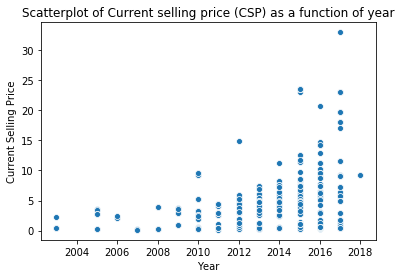

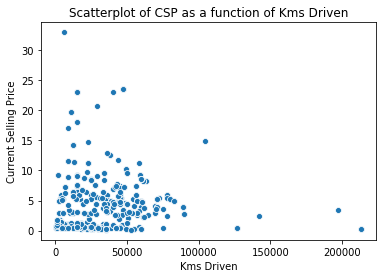

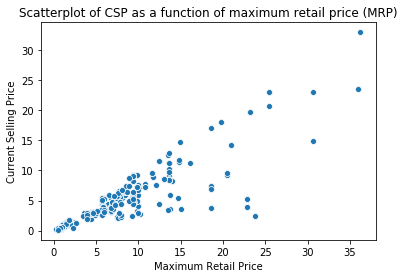

In [213]:
# your code here

sns.scatterplot(data=df, x='Year', y='Current_Selling_Price')
plt.xlabel('Year')
plt.ylabel('Current Selling Price')
plt.title("Scatterplot of Current selling price (CSP) as a function of year")
plt.show()

sns.scatterplot(data=df, x='Kms_Driven', y='Current_Selling_Price')
plt.xlabel('Kms Driven')
plt.ylabel('Current Selling Price')
plt.title("Scatterplot of CSP as a function of Kms Driven")
plt.show()

sns.scatterplot(data=df, x='MRP', y='Current_Selling_Price')
plt.xlabel('Maximum Retail Price')
plt.ylabel('Current Selling Price')
plt.title("Scatterplot of CSP as a function of maximum retail price (MRP)")
plt.show()


**INTERPRETATION:**

**MRP: The last scatterplot shows us the CSP as a function of the maximum retail price of the car when it was new. This is the variable that seems most to linearly correlate with the current selling price. Hence, based on correlation alone we can visually observe from this plot, this is the predictor that seems to explain the current selling price the best.**

**Additionally when plotting 'Kms Driven' with our "csp", there is no corelation. It worth mentioning that the reason "year vs csp" is not the best predictor is the increase in variance for larger values of Year. For example, if we try to predict the 'csp' visually for a large 'year' value, we would not be able to.** 


<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We begin our modeling with k-Nearest Neighbors (kNN) regression. For this, we will use `sklearn`'s built-in functions.

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.

- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 
- **2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)
- **2.2.3** Find the best model based on the test $MSE$ values.
- **2.2.4** Evaluate and report the $R^2$ of the best model.


**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

- **2.3.1** How does the value of $k$ affect the fitted model?
- **2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  
- **2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
- **2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

## Question 2: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

</div>

In [214]:
train_data, test_data = train_test_split(df, test_size=0.25, random_state=109) 
x_train, y_train = train_data[['MRP']], train_data['Current_Selling_Price']
x_test, y_test = test_data[['MRP']], test_data['Current_Selling_Price']

<div class='exercise-r'>  

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.
    
- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

</div>

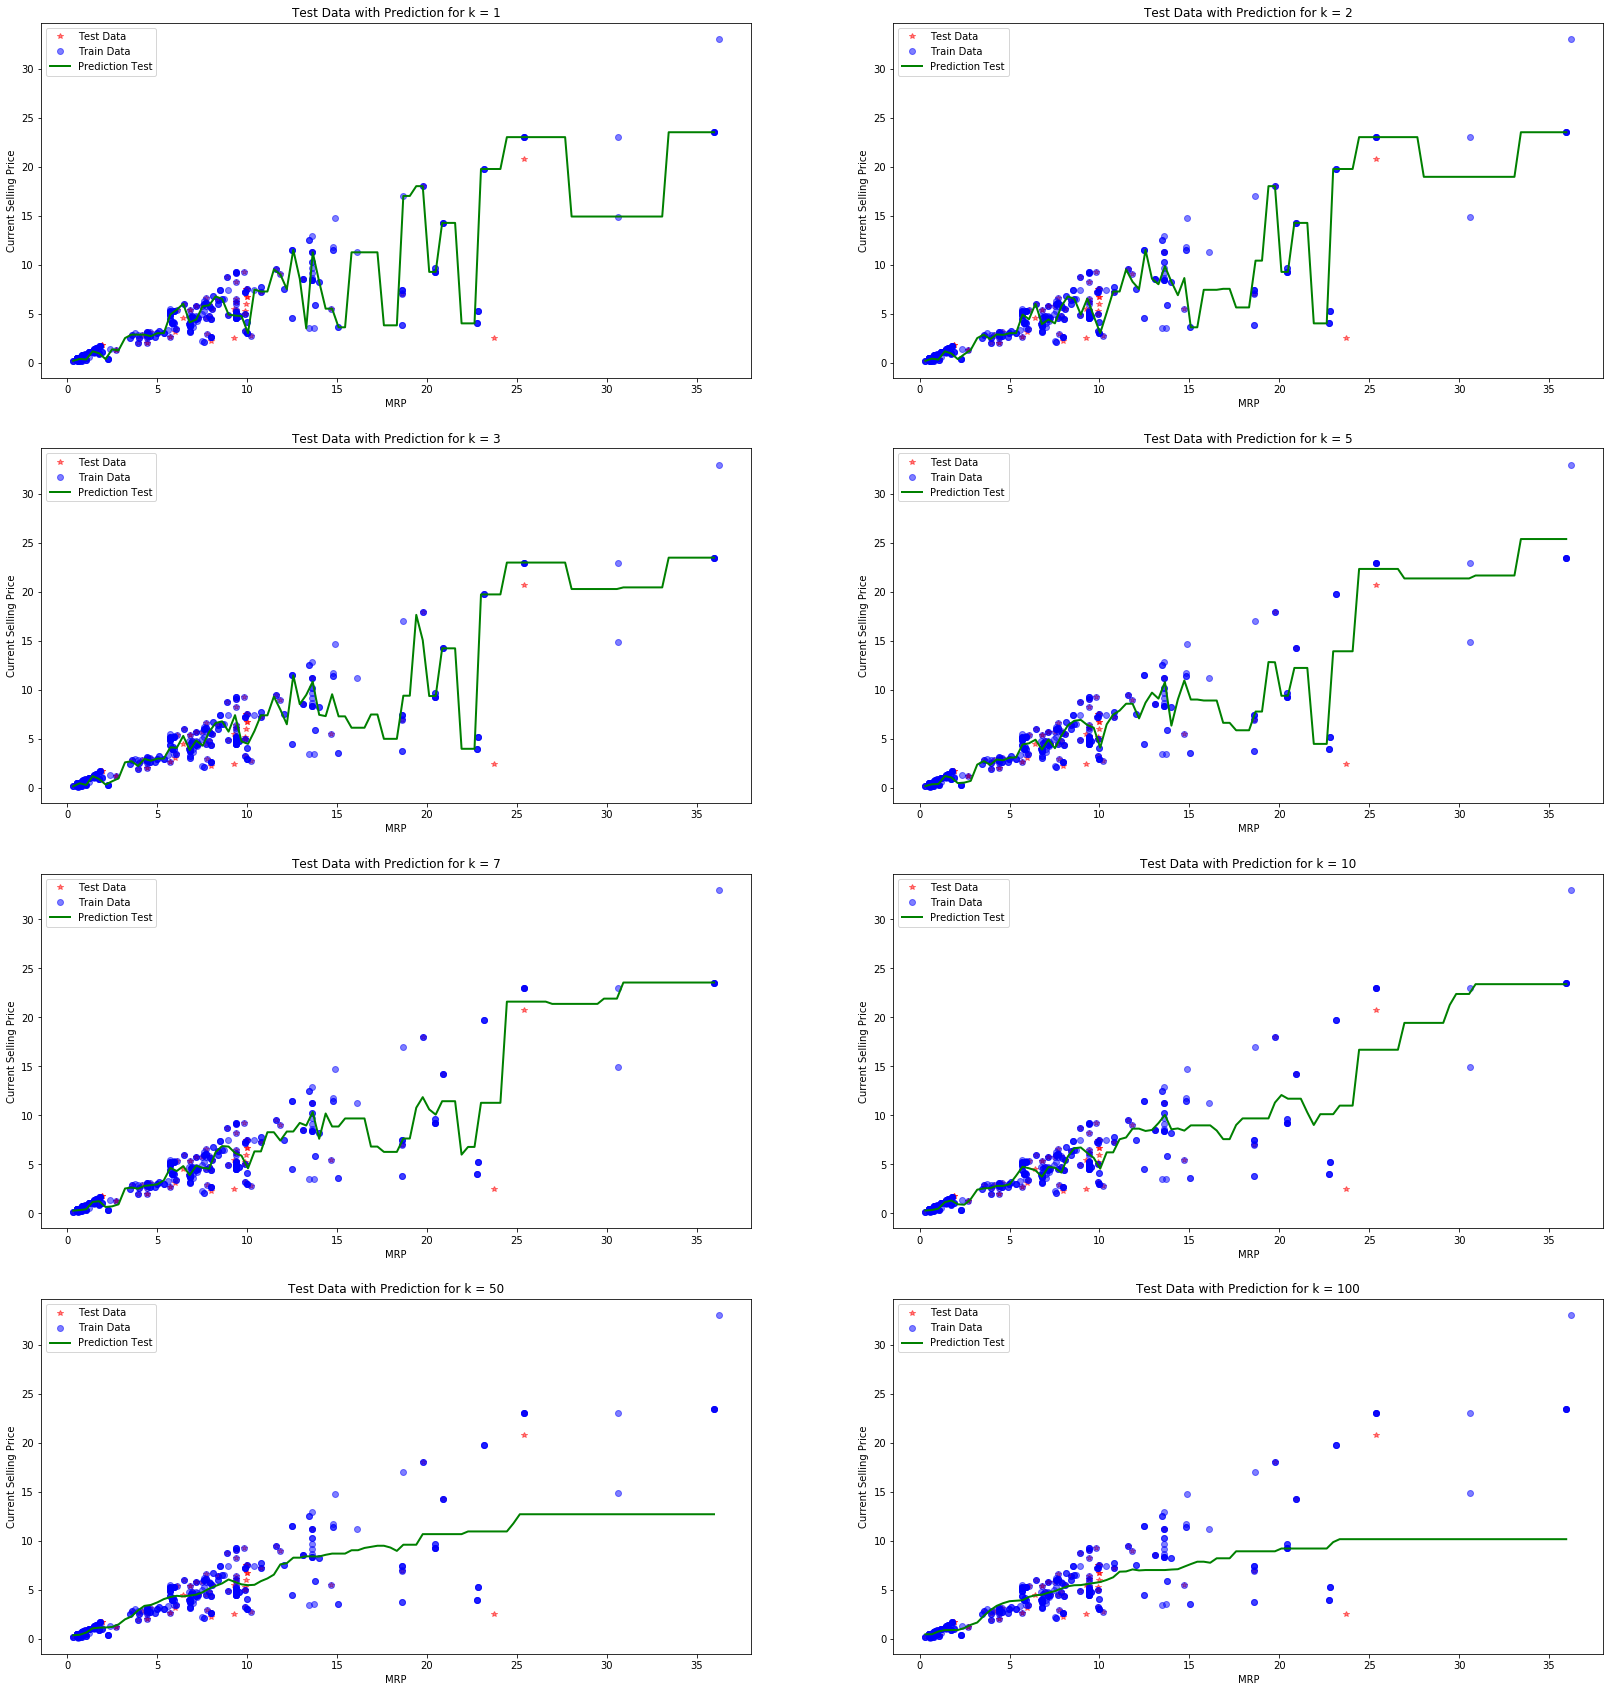

In [215]:
# modeling the knn technique
response = 'Current_Selling_Price'
list_of_ks = [1,2,3,5,7, 10, 50, 100] 

fig, axs = plt.subplots(4,2,figsize =(28,30))
axs = axs.flatten()
k_list = np.array([1,2,3,5,7,10,50,100])

xvals = np.linspace(x_test.min(),x_test.max(),100)

knn_test_preds = []


for i, k in enumerate(k_list):
    neighbors = KNeighborsRegressor(n_neighbors=k)   
    neighbors.fit(x_train, y_train) 
    y_preds = neighbors.predict(x_test) # creating real predictions
    pred_val = neighbors.predict(xvals) #creating the prediciton on synthetic values
    knn_test_preds.append(y_preds)
    

    axs[i].plot(x_test, y_test, 'r*', alpha = 0.5, label = 'Test Data' )
    axs[i].plot(x_train, y_train, 'bo', alpha = 0.5, label = 'Train Data' )
    axs[i].plot(xvals, pred_val, 'g-', linewidth = 2, markersize = 10, label = 'Prediction Test')
    #axs[i].plot(x_test, y_preds, 'g-', linewidth = 2, markersize = 10, label = 'Prediction Test')
    axs[i].set_title('Test Data with Prediction for k = {}'.format(k))
    axs[i].set_xlabel('MRP')
    axs[i].set_ylabel('Current Selling Price')
    axs[i].legend()

<div class='exercise-r'>  

**2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)

</div>

------ kNN model score for k = 1
MSE training set: 1.44
MSE testing set: 3.65
------ kNN model score for k = 2
MSE training set: 1.12
MSE testing set: 3.50
------ kNN model score for k = 3
MSE training set: 1.43
MSE testing set: 3.13
------ kNN model score for k = 5
MSE training set: 2.07
MSE testing set: 2.34
------ kNN model score for k = 7
MSE training set: 2.61
MSE testing set: 1.92
------ kNN model score for k = 10
MSE training set: 3.72
MSE testing set: 2.41
------ kNN model score for k = 50
MSE training set: 6.42
MSE testing set: 4.11
------ kNN model score for k = 100
MSE training set: 8.27
MSE testing set: 5.46


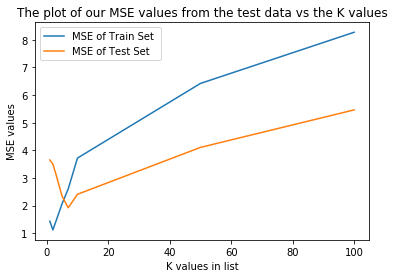

In [216]:
from sklearn.metrics  import r2_score
# set the response variable
response = 'Current_Selling_Price'

# then create the training feature set (X_train) and the response vector (y_train)
x_train = train_data[['MRP']] # note the two brackets
y_train = train_data[response] # one bracket
x_test = test_data[['MRP']] 
y_test = test_data[response] 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

#Here i create empty lists to populate them later to plot these values
mse_train_list = list()
mse_test_list = list()
r2_train_list = list()
r2_test_list = list()

# from sklearn.neighbors import KNeighborsRegressor
for k in list_of_ks:

    # First, we create the classifier object:
    neighbors = KNeighborsRegressor(n_neighbors=k)

    # Then, we fit the model using x_train as training data and y_train as target values:
    neighbors.fit(x_train, y_train)

    # Retrieve our predictions:
    y_pred_knn_test = neighbors.predict(x_test)
    y_pred_knn_train = neighbors.predict(x_train)
    
    # This returns the mean accuracy on the given test data and labels, or in other words, 
    # the R squared value -- A constant model that always predicts the expected value of y, 
    # disregarding the input features, would get a R^2 score of 1.
    r2_train = r2_score(y_train, y_pred_knn_train)
    r2_test = r2_score(y_test, y_pred_knn_test)
    mse_test = mean_squared_error(y_test,y_pred_knn_test)
    mse_train = mean_squared_error(y_train, y_pred_knn_train)
    
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    

    print(f'------ kNN model score for k = {k}')
    print(f'MSE training set: {mse_train:.2f}')
    print(f'MSE testing set: {mse_test:.2f}')

 
#plt.figure()
plt.plot(list_of_ks, mse_train_list, label = 'MSE of Train Set ')
plt.plot(list_of_ks, mse_test_list, label = 'MSE of Test Set ')
plt.xlabel('K values in list')
plt.ylabel('MSE values')
plt.title('The plot of our MSE values from the test data vs the K values')
plt.legend()
    

<div class='exercise-r'>  

**2.2.3** Find the best model based on the test $MSE$ values.

</div>

In [217]:
# Here I am finding the smallest mse of this list
min_mse = min(mse_test_list)

# Here I am finding the index of this smallest mse
min_i = mse_test_list.index(min_mse)

#This is the index of the k
print('The best model based on the test MSE values is the model with',
      list_of_ks[min_i], ' nearest neighbours, its MSE is', min_mse)


The best model based on the test MSE values is the model with 7  nearest neighbours, its MSE is 1.9218710771725909


<div class='exercise-r'>  

**2.2.4** Evaluate and report the $R^2$ of the best model.

</div>

In [218]:
# Reporting the R^2 of the best model
print('The training r^2 of the best model is', r2_train_list[min_i])
print('The testing r^2 of the best model is', r2_test_list[min_i])

The training r^2 of the best model is 0.8803016340015937
The testing r^2 of the best model is 0.88067733251126


<div class='exercise-r'>  

**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

**2.3.1** How does the value of $k$ affect the fitted model?

</div>

**For small values of k, we are in danger of overfitting in the provided dataset and we encounter less stability in the model for unseen data since outliers in the provided dataset can greatly affect the prediction of the unseen instance. On the other hand, for large values of k our smooth prediction is subject to underfitting since is not able to capture details.**



<div class='exercise-r'>  

**2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?

</div>

**Since we use the whole training set together, we will just create a model that predicts the mean of the training dataset for any observation.**


<div class='exercise-r'>  

**2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

</div>

**The aforementioned effects can be observed in the MSE plot, where we have high MSE values for low k values and high MSE for high k values. The difference between the minimum of training and test MSE in the plot is because, for k=1, we have zero bias at the training model, however, we are more likely to get larger residuals in the test set. When we increase k, the bias is increasing and the variance decreases, and since the test, MSE will provide an optima.**


<div class='exercise-r'>  

**2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

</div>

**After we have used the seed of 1 once, the seed of 5 once and the seed of 109 once, we see that: for small values of k, the MSE varies a lot depending on the split that happens between the train and test set, while in all cases the trend of increasing MSE for both train and test set as k becomes larger is valid.**


<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

- **3.1.1** Run a linear regression model.
- **3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.
- **3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.
- **3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

**NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- **3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

- **3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- **3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

## Question 3: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

**3.1.1** Run a linear regression model.

- **NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions.

</div>

In [219]:
# your code here
response = 'Current_Selling_Price'
train_data, test_data = train_test_split(df, train_size=0.75, random_state=109) 

x_train, y_train = train_data[['MRP']], train_data[response]
x_test, y_test = test_data[['MRP']], test_data[response]

lr_sklearn = LinearRegression().fit(x_train, y_train) 

y_pred_lr_test = lr_sklearn.predict(x_test)
y_pred_lr_train = lr_sklearn.predict(x_train)

<div class='exercise-r'>  

**3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.

</div>

In [220]:
# your code here
print('Coefficients:', lr_sklearn.coef_)
print('Intercept:', lr_sklearn.intercept_)

Coefficients: [0.61565992]
Intercept: 0.11236987692104439


<div class='exercise-r'>  

**3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.

</div>

In [221]:
# your code here 
r2_test_lr = metrics.r2_score(y_test, y_pred_lr_test) 
r2_train_lr = metrics.r2_score(y_train, y_pred_lr_train)
mse_test_lr = mean_squared_error(y_test, y_pred_lr_test)
mse_train_lr = mean_squared_error(y_train, y_pred_lr_train)

print(f'R2 testing set: {r2_test_lr:.3f}')
print(f'MSE training set: {mse_train_lr:.2f}')
print(f'MSE testing set: {mse_test_lr:.2f}')

R2 testing set: 0.805
MSE training set: 4.71
MSE testing set: 3.14


<div class='exercise-r'>  

**3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

</div>

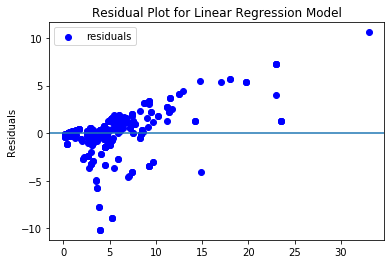

In [222]:
#creating residuals
residuals = (y_train - y_pred_lr_train) 
plt.scatter(y_train, residuals, color='blue', label = "residuals")
plt.legend()
plt.axhline()
plt.title("Residual Plot for Linear Regression Model")
plt.ylabel('Residuals');

<div class='exercise-r'>  

**3.2** Discuss your results by answering the following questions.

**3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression?

</div>

**The MSE score of the Linear Rregression model in the test set is higher (3.14) than the lowest MSE that we got from the kNN regression, which is 1.92.**

<div class='exercise-r'>  

**3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

</div>

**That positive sign shows that, in case there is a linear relationship, that linear relationship is a positive linear relationship: if the maximum retail price when first sold increases, so does increase also the current selling price.**


<div class='exercise-r'>  

**3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

</div>

**Linearity isn't valid because the residuals are not white noise. The residuals have a trend, the higher the value of the response variable, the higher the residual. This isn't supposed to happen had we picked the correct model. Consequently, linerarity is not valid for this data and we need to find a better model to explain the current selling price.**


<a id="part4questions"></a>

## <div class='exercise'><b>Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]</b></div>

[Return to contents](#contents)

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

- **4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

- **4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

- **4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

- **4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed?


**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.


**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

## Question 4: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

</div>

In [223]:
# your code here
df['perc']= (df['MRP'] - df['Current_Selling_Price'])/df['MRP']
df

,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649
...,...,...,...,...,...
596,2016,8.75,8.89,20273,0.016
597,2012,3.10,5.98,51439,0.482
598,2007,0.12,0.58,53000,0.793
599,2016,5.05,5.70,4293,0.114


<div class='exercise-r'>  

**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

**4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

</div>

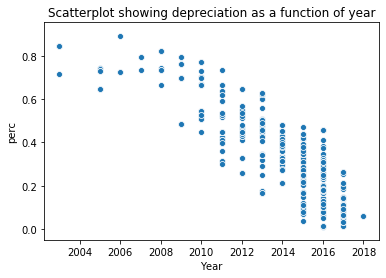

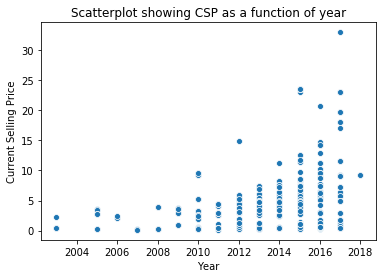

In [224]:
# your code here
response_4 = 'perc'

sns.scatterplot(data=df, x='Year', y='perc')
plt.xlabel('Year')
plt.ylabel('perc')
plt.title("Scatterplot showing depreciation as a function of year")
plt.show()


sns.scatterplot(data=df, x='Year', y='Current_Selling_Price')
plt.xlabel('Year')
plt.ylabel('Current Selling Price')
plt.title("Scatterplot showing CSP as a function of year")
plt.show()

**INTERPRETATION:**

**The depreciation value reduces as years go by. Meaning, that the older the cars, the bigger the depreciation.**
**The newer the cars, the smaller the depreciation.**

**Both 'perc' and 'CSP' each have a relationship with the variable year.** 

**This is the case because as years go by, the CSP (current selling price) increases. On the other hand, the more years ago, the smaller the CSP.**

**The older the car, the smaller the current selling price, as the higher the depreciation. The newer the car, the higher the current selling price, and the lower the depreciation. Hence, the relationship between Year and current selling price and the relationship between year and depreciation (perc), is related.**


<div class='exercise-r'>  

**4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

</div>

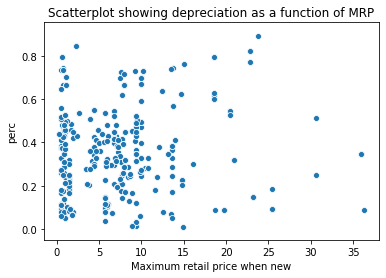

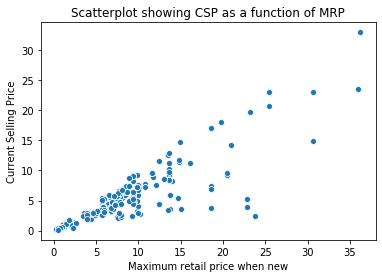

In [225]:
#creating plots to examine the trends
sns.scatterplot(data=df, x='MRP', y='perc')
plt.xlabel('Maximum retail price when new')
plt.ylabel('perc')
plt.title("Scatterplot showing depreciation as a function of MRP")
plt.show()


sns.scatterplot(data=df, x='MRP', y='Current_Selling_Price')
plt.xlabel('Maximum retail price when new')
plt.ylabel('Current Selling Price')
plt.title("Scatterplot showing CSP as a function of MRP")

plt.show()

**INTERPRETATION:**

**The relationship is not the same. Because it makes sense that  the higher the initial price, the higher the current selling price (regardless of when the car was first sold). But it doesn't make sense that the the higher the initial sale value, the higher also its depreciation. The depreciation depends more on the relationship between MRP and Current Selling Value and the year of when it was first sold.**


<div class='exercise-r'>  

**4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

</div>

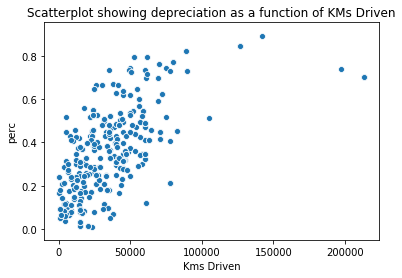

In [226]:

sns.scatterplot(data=df, x='Kms_Driven', y='perc')
plt.xlabel('Kms Driven')
plt.ylabel('perc')
plt.title("Scatterplot showing depreciation as a function of KMs Driven")

plt.show()


**INTERPRETATION:**

**Yes there is some sort of relationship. It makes sense that the more a car was used, the higher the depreciation value of it. We can see that the more KMs driven, also the higher the depreciation on the value of a car, which makes sense. But this doens't look like a linear relationship but rather more like a quadratic relationship.**


<div class='exercise-r'>  

**4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed? 

</div>

**Year is a good predictor for the depreciation,  perc. It is not the same predictor as the one previously chosen for CSP.**


<div class='exercise-r'>  

**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.

</div>

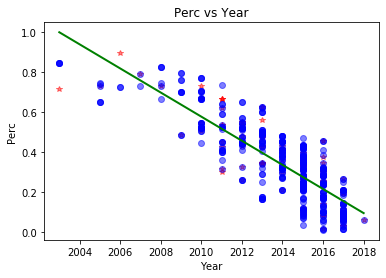

------ Linear model score for Year as predictor
MSE training set: 0.01
MSE testing set: 0.01


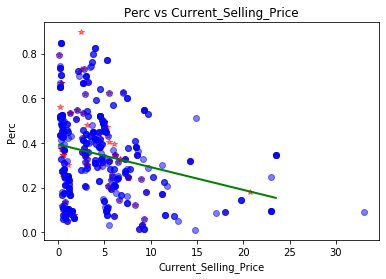

------ Linear model score for Current_Selling_Price as predictor
MSE training set: 0.04
MSE testing set: 0.03


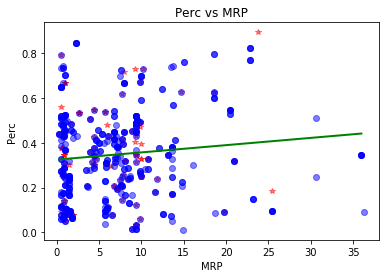

------ Linear model score for MRP as predictor
MSE training set: 0.04
MSE testing set: 0.03


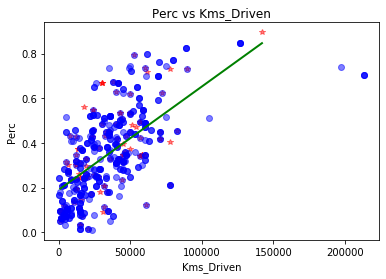

------ Linear model score for Kms_Driven as predictor
MSE training set: 0.02
MSE testing set: 0.02


In [227]:
# your code here
response = 'perc'
train_data_perc, test_data_perc = train_test_split(df, train_size=0.75, random_state=109) 

    
#creating an empty list
mse_train_list = list()
mse_test_list = list()


  
for i, col_name in enumerate(df.columns.values[:-1]):

    x_train_perc, y_train_perc = train_data_perc[[col_name]], train_data_perc[response]
    x_test_perc, y_test_perc = test_data_perc[[col_name]], test_data_perc[response]

    lr_perc = LinearRegression().fit(x_train_perc, y_train_perc) # x data must be 2D array

    y_pred_lr_test_perc = lr_perc.predict(x_test_perc)
    y_pred_lr_train_perc = lr_perc.predict(x_train_perc)
    
    #print(y_pred_lr_test_perc)
    #print(y_pred_lr_train_perc)

    xvals_perc = np.linspace(x_test_perc.min(),x_test_perc.max(),100)
    lr_perc.fit(x_train_perc, y_train_perc) 
    y_preds_perc = lr_perc.predict(x_test_perc) # creating real predictions
    pred_val_perc = lr_perc.predict(xvals_perc) #creating the prediciton on synthetic values
   
    plt.plot(x_test_perc, y_test_perc, 'r*', alpha = 0.5, label = 'Test Data' )
    plt.plot(x_train_perc, y_train_perc, 'bo', alpha = 0.5, label = 'Train Data' )
    plt.plot(xvals_perc, pred_val_perc, 'g-', linewidth = 2, markersize = 10, label = 'Prediction Test')

    plt.xlabel(col_name)
    plt.ylabel('Perc')
    plt.title(f'Perc vs {col_name}')
    plt.show()
    
    mse_test = mean_squared_error(y_test_perc,y_pred_lr_test_perc)
    mse_train = mean_squared_error(y_train_perc, y_pred_lr_train_perc)
    
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
  
    print(f'------ Linear model score for {col_name} as predictor')
    print(f'MSE training set: {mse_train:.2f}')
    print(f'MSE testing set: {mse_test:.2f}')

In [228]:
# your code here

# Here I am finding the smallest mse of this list
min_mse = min(mse_test_list)

# Here I am finding the index of this smallest mse
min_i = mse_test_list.index(min_mse)


print('The best model based on the test MSE values is the model with',
      df.columns.values[min_i], ' as predictor. Its  test MSE is', min_mse)


# Here I am finding the smallest mse of this list
min_mse = min(mse_train_list)

# Here I am finding the index of this smallest mse
min_i = mse_train_list.index(min_mse)


print('The best model based on the test MSE values is the model with',
      df.columns.values[min_i], ' as predictor. Its  train MSE is', min_mse)



The best model based on the test MSE values is the model with Year  as predictor. Its  test MSE is 0.009921906416753296
The best model based on the test MSE values is the model with Year  as predictor. Its  train MSE is 0.010839364968083132


**INTERPRETATION:**

**The best predictor for depreciation, perc, is Year as it has the lowest MSE compared to modelling perc with the other given variables.**


<div class='exercise-r'>  

**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

</div>

Given how depreciation is here defined, meaning the following:
$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$

and given that year is the best variable to model perc, hence the following: 
$$ perc = \beta_0 + \beta_1 \cdot Year$$

We can manipulate this as:

$$ perc =\frac{MRP - CSP}{MRP} = \beta_0 + \beta_1 \cdot Year $$
$$ \frac{MRP - CSP}{MRP} = \beta_0 + \beta_1 \cdot Year $$
$$ 1- \frac{CSP}{MRP} = \beta_0 + \beta_1 \cdot Year $$
$$ -1 + \frac{CSP}{MRP} = -(\beta_0 + \beta_1 \cdot Year) $$
$$ \frac{CSP}{MRP} = 1-(\beta_0 + \beta_1 \cdot Year ) $$
$$  CSP = (1-(\beta_0 + \beta_1 \cdot Year )\cdot MRP $$

We know that we can find the estimators $\beta_0$ and $\beta_1$ from fitting the model  
$$ perc = \beta_0 + \beta_1 \cdot Year$$

After this, we will backsolve this to estimate the current selling value, as shown by the manipulation above. 
The code for this follows:











In [229]:
#Here we try to find out beta_0 and beta_1

response = 'perc'

x_train_perc, y_train_perc = train_data_perc[['Year']], train_data_perc[response]
x_test_perc, y_test_perc = test_data_perc[['Year']], test_data_perc[response]

lr_perc = LinearRegression().fit(x_train_perc, y_train_perc) # x data must be 2D array

y_pred_lr_test_perc = lr_perc.predict(x_test_perc)
y_pred_lr_train_perc = lr_perc.predict(x_train_perc)

#print(y_pred_lr_test_perc.mean())
#print(y_pred_lr_train_perc.mean())

beta_1 = lr_perc.coef_
beta_0 =lr_perc.intercept_
    
#print(beta_0)
#print(beta_1)


In [230]:
#Here we check if our hard coded prediction of perc matches the y_pred_lr_test_perc and y_pred_lr_train_perc

pred_perc_test = beta_0 + beta_1*test_data_perc[['Year']]
#print(pred_perc_test.mean())

pred_perc_train = beta_0 + beta_1*train_data_perc[['Year']]
#print(pred_perc_train.mean())


In [231]:
# Here we are predicting CSP with the previous model with also MRP by equating
# perc with its formula and its linear model mentioned above, i.e. perc = beta_0 + beta_1
# This comes from the manipulations performed above

pred_csp_train = train_data_perc['MRP']*(1-(beta_0 + beta_1*train_data_perc['Year']))
#print(pred_csp_train.head())
pred_csp_test = test_data_perc['MRP']*(1-(beta_0 + beta_1*test_data_perc['Year']))
#print(pred_csp_test.head())


In [232]:

#These are the errors of the CSP predicted with the model from the manipulations above 
r2_test_lr = metrics.r2_score(test_data_perc['Current_Selling_Price'], pred_csp_test) 
r2_train_lr = metrics.r2_score(train_data_perc['Current_Selling_Price'], pred_csp_train)
mse_test_lr = mean_squared_error(test_data_perc['Current_Selling_Price'], pred_csp_test)
mse_train_lr = mean_squared_error(train_data_perc['Current_Selling_Price'], pred_csp_train)

#print(f'R2 training set: {r2_train_lr:.3f}')
print(f'R2 testing set: {r2_test_lr:.3f}')
print(f'MSE training set: {mse_train_lr:.2f}')
print(f'MSE testing set: {mse_test_lr:.2f}')

R2 testing set: 0.961
MSE training set: 0.96
MSE testing set: 0.63


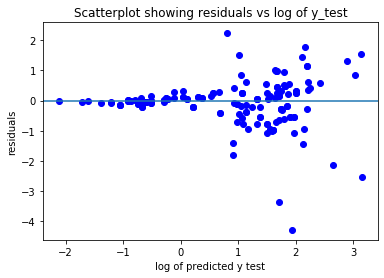

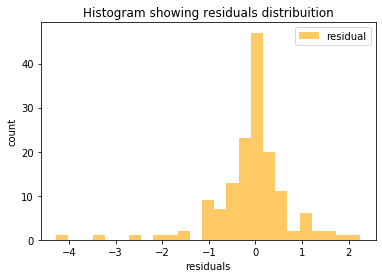

In [233]:
residuals_train = train_data_perc['Current_Selling_Price'] - pred_csp_train
residuals_test = test_data_perc['Current_Selling_Price'] - pred_csp_test

log_y_test = np.log(test_data_perc['Current_Selling_Price'])

plt.scatter(log_y_test, residuals_test, color = "blue", label="residuals" )
plt.axhline()
plt.xlabel('log of predicted y test')
plt.ylabel('residuals')
plt.title("Scatterplot showing residuals vs log of y_test")
plt.show()

bins =25
plt.hist(residuals_test, bins, alpha = 0.6, color = "orange", label='residual')
plt.xlabel('residuals')
plt.title("Histogram showing residuals distribuition")
plt.ylabel("count")
plt.legend()
plt.show()




**INTERPRETATION:**

**Given that we have used the Year variable in an alternative way from the depreciation modelling, with additionally the MRP from above, this model is very much better than the model before where CSP was predicted with MRP alone. This model takes depreciation into consideration through the Year variable and its R^2 is almost 1, it is 0.960. This R^2 is much higher compared to the previous model with MRP alone, where the R^2 was 0.805 and the MSE in training was 4.71 and the MSE in testing was 3.14. Here our MSEs are much lower, in test 0.63 and in training 0.96.**

**By doing a scatter plot of the residuals vs the log of the predicted y test value, we can see that for higher predictions the residual is higher, hence we don't really see white noise. Given this, this model is still not ideal, despite the nice values underlined above (High, R^2 and lower MSEs). Hence, there still might be other variables that we should take into consideration to better model the income, especially for the high earners. Nonetheless, the distribuition of the errors looks almost normally distributed, as seen in the histogram.**


<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze data from publically available [profiles on SimplyMarry.com](https://en.wikipedia.org/wiki/SimplyMarry), an Indian matrimonial matching portal that was closed in 2017. We will use this data to investigate relationships among various attributes reported in user profiles and examine trends embedded in this data that relate user-reported income.

### Dataset

The SimplyMarry.com data is aggregated in the file named `data/Income_prediction.csv`. All attributes in this dataset refer to traits and preferences of users looking for a spouse on SimplyMarry.com. The attributes that refer specifically to preferences, rather than traits, are clarified in the list below. 

- **age** - Age of person looking for a spouse
- **gender** - {'Female': 0, 'Male': 1} 
- **height** - Height in inches
- **bmi** - Body mass index (BMI) calculated based on height and weight
- **eating** - {'No Restrictions': 0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - Family living arrangement preference of the person looking for a spouse ('Doesn't Matter': 0, 'Other': 3, 'Nuclear': 1, 'Joint family': 2}
- **status** - Social status preference of the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Prefers Not To Respond': 0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ': 3, 'Wheatish Medium ': 4, 'Dark': 5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School': 0, 'Some college': 1, 'Undergrad': 2, 'Grad': 3, 'Doctorate': 4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi': 3, 'Kolkata': 4, 'Bengaluru': 5, 'Chennai': 6, 'Hyderabad': 7, 'Pune': 8, 'Ahmedabad': 9, 'Surat': 10, 'Vishakapatnam': 11, 'Others': 12)
- **income** - Annual income in dollars

**NOTE:** Within the **family_type** attribute, the 'Joint family' category denoted by a value of 2 comprises several more granular joint-family options not shown here. Those various types of joint family arrangements include 'Joint family both parents', 'Joint family only mother', 'Joint family father mother and brothers sisters', 'Joint family single parent brothers and or sisters', and 'Joint family only father', each of which has simply been aggregated under 'Joint family' in our dataset.

*Source: Harvard IACS*

### Disclaimer

This dataset is several years old and representative of profiles from a site that no longer exists. Some attributes represented in this dataset are particularly challenging to approach even with far more sophisticated analyses and nuanced considerations than we will be applying in this assignment. Extremely simple, reductive analysis on sensitive topics such as these can sometimes do more harm than good. For those reasons, please be cognizant not to draw pontentially harmful generalizations from any results or findings you generate below. We will be exploring ethics and the potential harms of biases and generalizations in data science in greater depth as we continue throughout this semester.

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5: Investigating relationships of SimplyMarry.com reported attributes [25 pts]</b></div>

[Return to contents](#contents)

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

**5.7** Is income lower or higher for those living in "nuclear" families?

**5.8** What is the average effect of the "Manglik" variable on income?


## Question 5: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

</div>

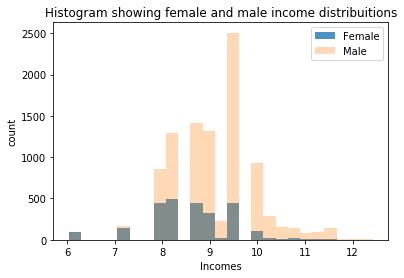

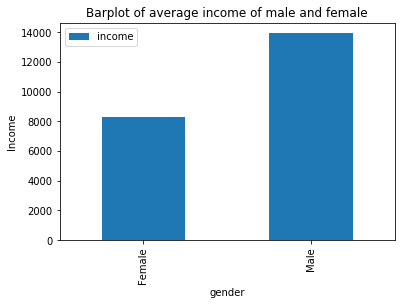

In [234]:
# your code here 

df = pd.read_csv('data/Income_prediction.csv')
df['income_log']= np.log(df['income'])

gender = df['gender'] #from here we will later be able to find the females as 0 and the males as 1

female = df[df['gender']==0]
female_income=female['income_log']

male = df[df['gender'] ==1]
male_income = male['income_log']


bins =25
plt.hist(female_income, bins, alpha = 0.8, label='Female') 
plt.hist(male_income, bins, alpha = 0.3, label ='Male')
plt.xlabel('Incomes')
plt.title("Histogram showing female and male income distribuitions")
plt.ylabel("count")
plt.legend()
plt.show()

by_gender_average_income= df.groupby('gender')['income'].mean()
by_gender_average_income= by_gender_average_income.rename({0:"Female", 1:"Male"})
by_gender_average_income = by_gender_average_income.plot(kind='bar', title="Barplot of average income of male and female")
plt.ylabel("Income")
plt.legend()
plt.show()


#by_gender_average_income.plot.title("Barplot of average income of male and female")



**INTERPRETATION:**

**Yes there is a disparity of income by genders. From the histogram we can see that there are many more many compared to women earning higher salaries. On the Bar plot we can see that the average salary of a male is higher than the average salary of a female.**


<div class='exercise-r'>  

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.

</div>

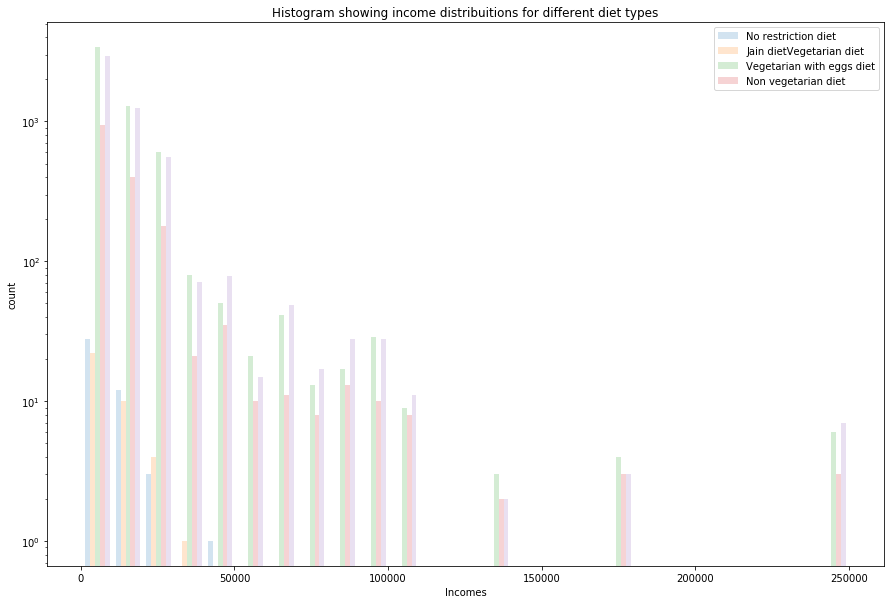

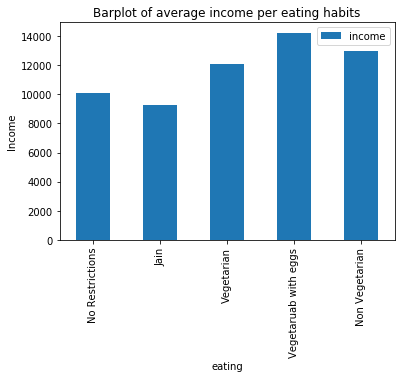

In [235]:

df = pd.read_csv('data/Income_prediction.csv')
#df['income_log']= np.log(df['income'])


eating = df['eating'] 

no_restriction = df[df['eating']==0]
nr_income=no_restriction['income']

jain = df[df['eating'] ==1]
jain_income = jain['income']

vegetarian = df[df['eating'] ==2]
vegetarian_income = vegetarian['income']

veg_eggs = df[df['eating'] ==3]
v_eggs_income = veg_eggs['income']

non_vegetarian = df[df['eating'] ==4]
non_veg_income = non_vegetarian['income']


bins =25
plt.figure(figsize=(15, 10))
plt.hist([nr_income, jain_income, vegetarian_income, v_eggs_income, non_veg_income], bins, alpha = 0.2, label=['No restriction diet', 'Jain diet'\
                               'Vegetarian diet', 'Vegetarian with eggs diet', 'Non vegetarian diet'], log = True) 
plt.ylabel("count")

#plt.hist(jain_income, bins, alpha = 0.3, label ='Jain diet', log = True)
#plt.hist(vegetarian_income, bins, alpha = 0.4, label ='Vegetarian diet', log = True)
#plt.hist(v_eggs_income, bins, alpha = 0.3, label ='Vegetarian with eggs diet', log = True)
#plt.hist(non_veg_income, bins, alpha = 0.4, label ='Non vegetarian diet', log = True)

plt.xlabel('Incomes')
plt.title("Histogram showing income distribuitions for different diet types")
plt.legend()
plt.show()


by_eating_average_income = df.groupby('eating')['income'].mean()
by_eating_average_income = by_eating_average_income.rename({0:"No Restrictions", 1:"Jain", 2:"Vegetarian", 3:"Vegetaruab with eggs", 4:"Non Vegetarian"})
by_eating_average_income = by_eating_average_income.plot(kind='bar', title = "Barplot of average income per eating habits")
plt.ylabel("Income")
plt.legend()
plt.show()



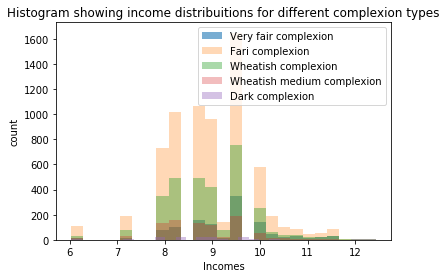

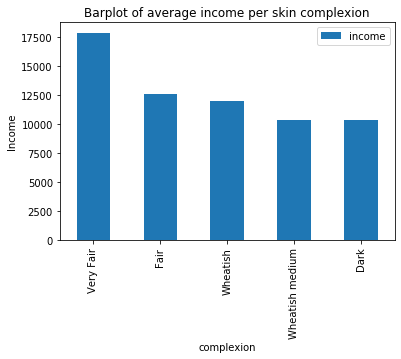

In [236]:


df = pd.read_csv('data/Income_prediction.csv')
df['income_log']= np.log(df['income'])

complexion = df['complexion'] #from here we will later be able to find the females as 0 and the males as 1

very_fair = df[df['complexion']==1]
vf_income=very_fair['income_log']

fair = df[df['complexion'] ==2]
fair_income = fair['income_log']

wheatish = df[df['complexion'] ==3]
wheatish_income = wheatish['income_log']

wheatish_medium = df[df['complexion'] ==4]
wm_income = wheatish_medium['income_log']

dark = df[df['complexion'] ==5]
dark_income = dark['income_log']


bins =25
plt.hist(vf_income, bins, alpha = 0.6, label='Very fair complexion') 
plt.hist(fair_income, bins, alpha = 0.3, label ='Fari complexion')
plt.hist(wheatish_income, bins, alpha = 0.4, label ='Wheatish complexion')
plt.hist(wm_income, bins, alpha = 0.3, label ='Wheatish medium complexion')
plt.hist(dark_income, bins, alpha = 0.4, label ='Dark complexion')
plt.xlabel('Incomes')
plt.title("Histogram showing income distribuitions for different complexion types")
plt.ylabel("count")
plt.legend()
plt.show()


df.groupby('complexion')['income'].mean()


by_complexion_average_income = df.groupby('complexion')['income'].mean()
by_complexion_average_income = by_complexion_average_income.rename({1:"Very Fair", 2:"Fair", 3:"Wheatish", 4:"Wheatish medium", 5: "Dark"})
by_complexion_average_income = by_complexion_average_income.plot(kind='bar', title = "Barplot of average income per skin complexion")
plt.ylabel("Income")
plt.legend()
plt.show()



**INTERPRETATION:**

**There is really no relationship between the diet variable and the income that can be noticed from the histrogram and barplot above.**

**Contrarily, we notice a relationship between income and skin complexion.**
**We can see from the bar plot that on average the lighter the skin complexion, the higher the salary. From the Histogram we can see that the distribution of people with fair complexion showcases a higher amount of fair skinned people earning a high salary compared to the darker skin complexions.**

**I personally don't think that this variable, skin complexion, should be ordinal, but simply categorical. This because there isn't an intrinsic 'better' or 'worse' value in this variable. Considering it like that would lead to misleading and racist-leaning interpretations of the dataset. We know that the dataset is biased because society is biased, so it is not surprising to see higher income values for lighter skin tones - this however isn't a sufficient reason to call this variable ordinal. Nonetheless, the professor suggested that it should be an ordinal variable because fair is more near to very fair rather than dark, because of the colour grading. Hence given that skin colour can be seen on a colour grading scale, this variable can be considered ordinal.**


<div class='exercise-r'>  

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

</div>

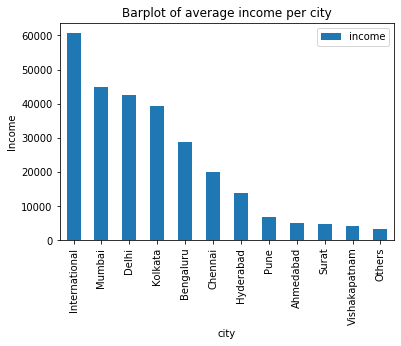

In [237]:
# your code here

by_city_average_income = df.groupby('city')['income'].mean()
by_city_average_income = by_city_average_income.rename({1:"International", 2:"Mumbai", 
                                                        3:"Delhi", 4:"Kolkata", 5: "Bengaluru",
                                                       6:"Chennai", 7:"Hyderabad", 8:"Pune",
                                                       9:"Ahmedabad",10:"Surat", 11:"Vishakapatnam", 12:"Others"})
by_city_average_income = by_city_average_income.plot(kind='bar', title = "Barplot of average income per city")
plt.ylabel("Income")
plt.legend()
plt.show()




**INTERPRETATION:**

**Yes there is a discernable trend in income for different cities, where the higher salaries are in the international salaries.**


<div class='exercise-r'>  

**5.4** Is there a clear trend between BMI and income?

</div>

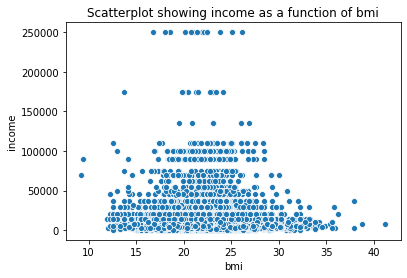

In [238]:

sns.scatterplot(data=df, x='bmi', y='income')
plt.xlabel('bmi')
plt.ylabel('income')
plt.title("Scatterplot showing income as a function of bmi")
#plt.legend()
plt.show()

**INTERPRETATION:**

**There is no visible trend between bmi and income.**


<div class='exercise-r'>  

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

</div>

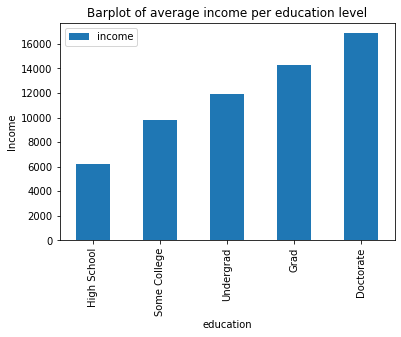

In [239]:
# your code here
by_education_average_income = df.groupby('education')['income'].mean()
by_education_average_income = by_education_average_income.rename({0: "High School", 1:"Some College", 2:"Undergrad", 3:"Grad", 4:"Doctorate"})
by_education_average_income = by_education_average_income.plot(kind='bar', title = "Barplot of average income per education level")
plt.ylabel("Income")
plt.legend()
plt.show()

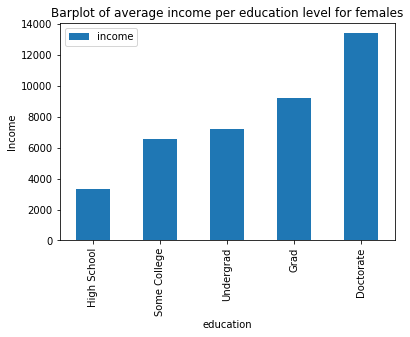

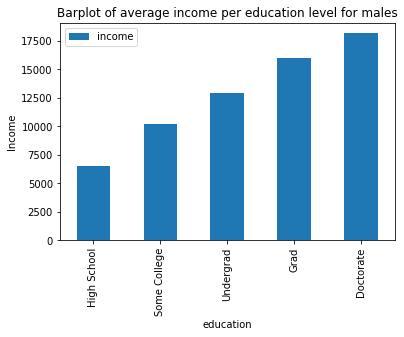

In [240]:

gender = df['gender'] #from here we will later be able to find the females as 0 and the males as 1

female = df[df['gender']==0]
male = df[df['gender'] ==1]


plt.figure()
by_gender_average_income_f= female.groupby('education')['income'].mean()
by_gender_average_income_f= by_gender_average_income_f.rename({0: "High School", 1:"Some College", 2:"Undergrad", 3:"Grad", 4:"Doctorate"})
by_gender_average_income_f = by_gender_average_income_f.plot(kind='bar', title="Barplot of average income per education level for females")
plt.ylabel("Income")
plt.legend()
plt.show()


plt.figure()
by_gender_average_income_m= male.groupby('education')['income'].mean()
by_gender_average_income_m= by_gender_average_income_m.rename({0: "High School", 1:"Some College", 2:"Undergrad", 3:"Grad", 4:"Doctorate"})
by_gender_average_income_m = by_gender_average_income_m.plot(kind='bar', title="Barplot of average income per education level for males")
plt.ylabel("Income")
#by_gender_average_income_m = by_gender_average_income_m.plot(kind='barh', title="Barplot of average income per education level for males")
plt.legend()
plt.show()




**INTERPRETATION:**

**Yes there is a visible trend between income and education. The higher the level of education, the higher the average salary.**

**Additionally, the trend is not similar for male and female. The most that a woman earns, even with a doctorate, is still less than what a male earns with a doctorate. This applies to the other categories of education as well. Overall, a woman earns less than a male, for any education level.**




<div class='exercise-r'>  

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

</div>

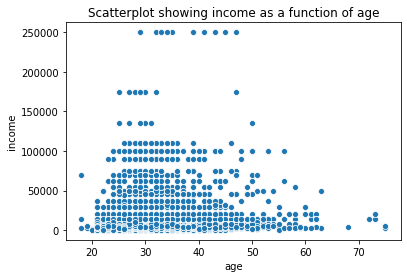

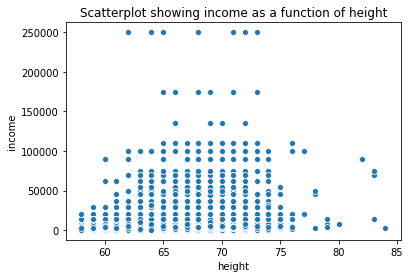

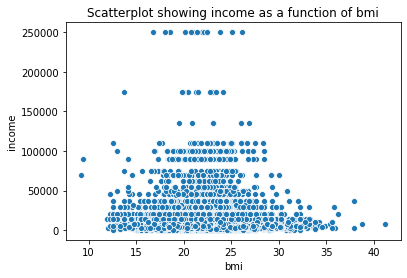

In [241]:
#print(df.head())


sns.scatterplot(data=df, x='age', y='income')
plt.xlabel('age')
plt.ylabel('income')
plt.title("Scatterplot showing income as a function of age")
plt.show()

sns.scatterplot(data=df, x='height', y='income')
plt.xlabel('height')
plt.ylabel('income')
plt.title("Scatterplot showing income as a function of height")
plt.show()

sns.scatterplot(data=df, x='bmi', y='income')
plt.xlabel('bmi')
plt.ylabel('income')
plt.title("Scatterplot showing income as a function of bmi")
plt.show()

# Quantitative attributes, everything that is not categorical.
#scatterplot is ok, there is simply no linear relationship
#scsatter matrix




**INTERPRETATION:**

**No linear relationship can be seen in any of the graphs above.**


<div class='exercise-r'>  

**5.7** Is income lower or higher for those living in "nuclear" families?

</div>

The average income of those living in nuclear families is 13805.933391761613. This is higher than the average income of those living n a joint family (11331.142208774583), of those  living in an 'other' type of family( 13597.720430107527), and of those living in a 'doesn't matter' type of family(13357.2).


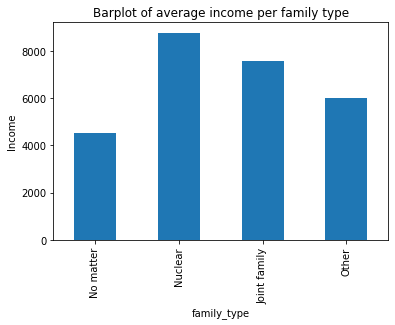

In [242]:
# your code here 

#sns.scatterplot(data=df, x='family_type', y='income')
#plt.xlabel('family_type')
#plt.ylabel('income')
#plt.show()


fam_mean = df.groupby('family_type')['income'].mean()


no_matter = fam_mean[0]
#print(no_matter)

nuclear = fam_mean[1]
#print(nuclear)

joint_family = fam_mean[2]
#print(joint_family)

other = fam_mean[3]
#print(other)


plt.figure()
by_fam_average_income= female.groupby('family_type')['income'].mean()
by_fam_average_income= by_fam_average_income.rename({0: "No matter", 1:"Nuclear"\
                                                     , 2:"Joint family", 3:"Other"})
by_fam_average_income= by_fam_average_income.plot(kind='bar', title="Barplot of average income per family type")
plt.ylabel("Income")


print(f"The average income of those living in nuclear families is {nuclear}. This is higher than the average income of those living n a joint family ({joint_family}), of those  living in an 'other' type of family( {other}), and of those living in a 'doesn't matter' type of family({no_matter}).")


#take average

#boxpot



**INTERPRETATION:**

**The highest average income is from those living in a nuclear family.**


<div class='exercise-r'>  

**5.8** What is the average effect of the "Manglik" variable on income?

</div>

The average income of those that are manglik is 11899.044534412955. This is lower than the average income of those not manglik, i.e. 13068.402284408909. Also the average income of those that are manglik is lower of also those who answered 'I don't know' to the manglik in the questionnaire, i.e. 11995.653661143773.


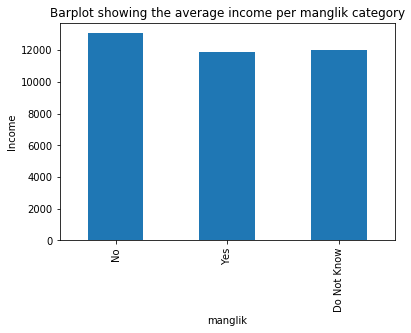

In [243]:
# your code here


#sns.scatterplot(data=df, x='manglik', y='income')
#plt.xlabel('manglik')
#plt.ylabel('income')
#plt.show()

manglik = df["manglik"]

no= df[manglik ==0]
no_income = no["income"].mean()

yes = df[manglik==1]
yes_income = yes["income"].mean()

idk = df[manglik==2]
idk_income = idk["income"].mean()

#mang_mean = df.groupby('manglik')['income'].mean()


print(f"The average income of those that are manglik is {yes_income}. This is lower than the average income of those not manglik, i.e. {no_income}. Also the average income of those that are manglik is lower of also those who answered 'I don't know' to the manglik in the questionnaire, i.e. {idk_income}.")



by_manglik_average_income = df.groupby('manglik')['income'].mean()
by_manglik_average_income = by_manglik_average_income.rename({0: "No", 1:"Yes", 2:"Do Not Know"})
by_manglik_average_income = by_manglik_average_income.plot(kind='bar', title = "Barplot of average income per manglik")
plt.ylabel("Income")
plt.title("Barplot showing the average income per manglik category")
plt.show()


#by_manglik_average_income

#df.groupby('manglik')['income'].mean()
#take average
#box plot



**INTERPRETATION:**

**The average effect of manglik being yes is that the income is lowered. If someone is in the manglik category, their average income is lower compared to someone who is not in the manglik category.**


<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Calculate the Gini coefficient [15 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

## Question 6: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

</div>

In [244]:
# your code here
df_new = pd.read_csv('data/Income_prediction.csv')
df_new.head()

#We find the length in rows of the dataset, i can use any column for this
n=len(df["age"])
income_sorted=sorted(df['income'])
gini=[]

income_sorted_sum= sum(income_sorted)
for i,x in enumerate(income_sorted):
    gini_i=(((2*i)-n-1)*x)
    gini.append(gini_i)
Gini_coef=sum(gini)/(n*income_sorted_sum)
print(Gini_coef)


0.49703778791928177


<div class='exercise-r'>  

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

</div>

**The Gini coefficient calculated from this dataset is 0.497. The actual Gini index of India is 0.357. From the dataset at hand, the inequality is higher within this dataset compared to the inqeuality in India as a whole. The income disparity on the SimplyMarry's user base is higher compared to the income disparity in India and Ukraine. However, the income disparity on the SimplyMarry's user base is lower compared to the income disparity in South Africa.**


**It is important however to mention that the dataset at hand is not representative of the whole population data of India as a whole. The income disparity in the website SimplyMarry is not representative of the income disparity in India. This can be for several reasons: maybe low-income people are more interested in websites of this kind, so there is a disproportion in salaries because simply the interest of high-salary earners in a dating website is lower. On the other hand, the data is self-reported in this database at hand. People could inflate their salary to have higher dating chances. Hence, the dataset at hand from SimplyMarry cannot be used to infer the income inequality in India.**

<a id="part7questions"></a>

### <div class='exercise'><b>Question 7 (required for 209a students, optional for others): Multi-linear regression [10 pts]</b></div>

[Return to contents](#contents)

Now we increase the scope of our analysis to solve another problem that is related to income of our SimplyMarry.com users.


![](data/modi.png)

*Image Source: [The Economic Times](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms)*

### Problem Description

Owing to a large number of people underreporting their income to evade taxes, as [reported by The Economic Times in 2017](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms), the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on information commonly available on SimplyMarry.com.

This will help the department flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given SimplyMarry.com dataset, using both the categorical and quantitative predictors available in this dataset.

As with all other homework problems, this is a learning exercise. And, as absurd or problematic as it might seem to use SimplyMarry.com data for this purpose, in the real world, it will be your decision to choose the types of data science projects on which you will work as well as the clients with which you will work. 

### Deliverables

To accomplish this task, we will fit a multiple linear regression model to the training set.

Use the `sklearn` library. Your code should be contained in a Jupyter notebook cell.  An appropriate level of code comments are necessary.  Your code should run and output the required outputs described below.

### Required Outputs

- Fit a multiple linear regression model on the training set and predict on the train and test sets.
- Report the $MSE$ for the train and test set.
- Report the $R^2$ score on the test set.
- Make a plot of residuals vs. log of predicted values $\hat{y}$, with residuals on the $y$-axis and predicted values on the $x$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a histogram of the residuals values.
- Be certain to provide a written interpretation of your findings and any important aspects of your modeling approach of which you'd want the teaching staff to be aware, particularly if you attempt any optional outputs as mentioned below.

### Optional Outputs

You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:

- Polynomial terms for continous variables,
- Interaction terms between variables,
- Feature selection among given predictors.


## Question 7: Solutions 

[Return to contents](#contents)

MSE train = 1.5607e+08
R^2 train = 0.49754
MSE test = 1.7801e+08
R^2 test = 0.43194


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in log


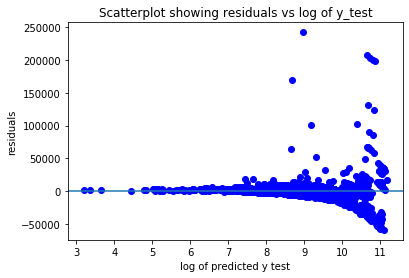

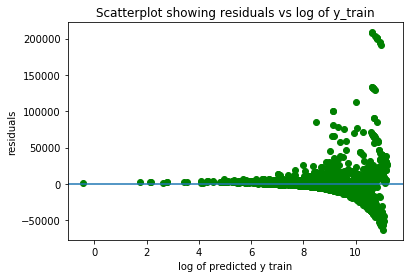

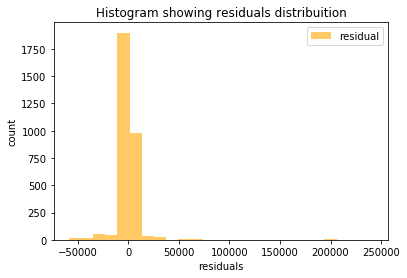

In [248]:
# your code here
categorical_cols = ['gender', 'eating', 'family_type', 'manglik', 'drinking', 'body', 'city'] # non-ordinal
#numerical_cols = ['age', 'height', 'bmi', 'income']
numerical_cols = ['age', 'height', 'bmi']
ordinal_cols = ['education', 'status', 'complexion']
# ordinal_col = ['education', 'complexion']

cat_type = CategoricalDtype(ordered=False)
for var in categorical_cols:
    df[var] = df[var].astype(cat_type)
    
train_data, test_data, y_train, y_test = train_test_split(df, df['income'], random_state=109, train_size = 0.75)

dummies_train = pd.get_dummies(train_data[categorical_cols]) #drop_first=True
dummies_test = pd.get_dummies(test_data[categorical_cols]) 

design_train_df = pd.concat([train_data[numerical_cols],train_data[ordinal_cols], dummies_train], axis=1)
design_test_df = pd.concat([test_data[numerical_cols], test_data[ordinal_cols], dummies_test], axis=1)

#create linear model
regression = LinearRegression()

#fit linear model
regression = regression.fit(design_train_df, y_train)

#testing
y_pred_test = regression.predict(design_test_df)
y_pred_train = regression.predict(design_train_df)

y_pred_train= y_pred_train.reshape(-1,1)
y_pred_test=y_pred_test.reshape(-1,1)

y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)


y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)


mse_train= mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'MSE train = {mse_train:.5}')
print(f'R^2 train = {r2_train:.5}')

mse_test= mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'MSE test = {mse_test:.5}')
print(f'R^2 test = {r2_test:.5}')

log_pred_test =np.log(y_pred_test)
log_pred_train = np.log(y_pred_train)

residuals_test = y_test - y_pred_test
residuals_train = y_train - y_pred_train

plt.scatter(log_pred_test, residuals_test, color = "blue", label="residuals" )
plt.axhline()
plt.xlabel('log of predicted y test')
plt.ylabel('residuals')
plt.title("Scatterplot showing residuals vs log of y_test")
plt.show()

plt.scatter(log_pred_train, residuals_train, color = "green", label="residuals" )
plt.axhline()
plt.xlabel('log of predicted y train')
plt.ylabel('residuals')
plt.title("Scatterplot showing residuals vs log of y_train")
plt.show()


bins =25
plt.hist(residuals_test, bins, alpha = 0.6, color = "orange", label='residual')
plt.xlabel('residuals')
plt.title("Histogram showing residuals distribuition")
plt.ylabel("count")
plt.legend()
plt.show()


**INTERPRETATION:**

**In this linear model we have predicted income with all variables in the dataset, i.e. all of them except the income variable. We have given dummy variables to the categorical variables and considered all the ordinal, categorial and all numerical variables to estimate the income. This however is still a linear model. This model compared to the model in 4.4 is less good, $R^2$ here is about 0.5 whereas in 4.4 it was about 0.9. Here we can see that for high predictions of income, the errors as very high. Hence, as above, there must be an additional variable ( which we are not aware of) that is influencing the income variable for high earners. Additionally, the errors don't look as normally distributed as in 4.4. Hence, this model is not as well-thought as the model in 4.4. To find something better, model selection through Lasso or through other model selection methods is advised.**
